In [4]:
import os
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3

local_weights_file = '/home/yahyaubuntu/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

pre_trained_model = InceptionV3(input_shape = (150, 150, 3), 
                                include_top = False, 
                                weights = None)

pre_trained_model.load_weights(local_weights_file)

for layer in pre_trained_model.layers:
  layer.trainable = False
  

last_layer = pre_trained_model.get_layer('mixed7')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

last layer output shape:  (None, 7, 7, 768)


In [7]:
from tensorflow.keras.optimizers import RMSprop

x = layers.Flatten()(last_output)
x = layers.Dense(1024,activation = 'relu')(x)
x = layers.Dropout(0.2)(x)
x = layers.Dense(1,activation = 'sigmoid')(x)

model = Model(pre_trained_model.input,x)

model.compile(optimizer = RMSprop(lr=0.0001),
             loss = 'binary_crossentropy',
              metrics=['accuracy'])

                

In [8]:
base_dir = '/home/yahyaubuntu/Desktop/course2CatsAndDogs/cats_and_dogs_filtered/'

train_dir = os.path.join(base_dir,'train')
validation_dir = os.path.join(base_dir,'validation')

train_cats_dir = os.path.join(train_dir,'cats')
train_dogs_dir = os.path.join(train_dir,'dogs')

validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

In [9]:
print('total images train cats ' , len(os.listdir(train_cats_dir)))
print('total images train dogs ' , len(os.listdir(train_dogs_dir)))

print('total validation cat images :', len(os.listdir( validation_cats_dir ) ))
print('total validation dog images :', len(os.listdir( validation_dogs_dir ) ))

total images train cats  1000
total images train dogs  1000
total validation cat images : 500
total validation dog images : 500


In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255.,
                                   rotation_range = 40,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator( rescale = 1.0/255. )

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size = 20,
                                                    class_mode = 'binary', 
                                                    target_size = (150, 150))     

validation_generator =  test_datagen.flow_from_directory( validation_dir,
                                                          batch_size  = 20,
                                                          class_mode  = 'binary', 
                                                          target_size = (150, 150))

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [11]:
history = model.fit(
            train_generator,
            validation_data = validation_generator,
            steps_per_epoch = 100,
            epochs = 20,
            validation_steps = 50,
            verbose = 2)

Epoch 1/20
100/100 - 114s - loss: 0.3340 - accuracy: 0.8620 - val_loss: 0.2526 - val_accuracy: 0.9000
Epoch 2/20
100/100 - 108s - loss: 0.2123 - accuracy: 0.9130 - val_loss: 0.1108 - val_accuracy: 0.9600
Epoch 3/20
100/100 - 109s - loss: 0.2106 - accuracy: 0.9255 - val_loss: 0.1193 - val_accuracy: 0.9580
Epoch 4/20
100/100 - 109s - loss: 0.1705 - accuracy: 0.9335 - val_loss: 0.1761 - val_accuracy: 0.9480
Epoch 5/20
100/100 - 109s - loss: 0.1904 - accuracy: 0.9405 - val_loss: 0.1123 - val_accuracy: 0.9640
Epoch 6/20
100/100 - 108s - loss: 0.1729 - accuracy: 0.9400 - val_loss: 0.1148 - val_accuracy: 0.9630
Epoch 7/20
100/100 - 109s - loss: 0.1953 - accuracy: 0.9365 - val_loss: 0.1327 - val_accuracy: 0.9590
Epoch 8/20
100/100 - 108s - loss: 0.1673 - accuracy: 0.9430 - val_loss: 0.1028 - val_accuracy: 0.9610
Epoch 9/20
100/100 - 108s - loss: 0.1497 - accuracy: 0.9515 - val_loss: 0.1120 - val_accuracy: 0.9670
Epoch 10/20
100/100 - 108s - loss: 0.1701 - accuracy: 0.9470 - val_loss: 0.0909 - 

In [18]:
import numpy as np

from tensorflow.keras.preprocessing import image

for i in range(10):
  # predicting images
  path = '/home/yahyaubuntu/Desktop/course2CatsAndDogs/cats_and_dogs_filtered/validation/cats/cat.200'+str(i)+'.jpg'
  img = image.load_img(path, target_size=(150, 150))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]>0.5:
    print(str(i) + " is a dog")
  else:
    print(str(i) + " is a cat")

[0.]
0 is a cat
[0.]
1 is a cat
[1.]
2 is a dog
[1.]
3 is a dog
[1.8594726e-37]
4 is a cat
[0.]
5 is a cat
[1.]
6 is a dog
[1.]
7 is a dog
[0.]
8 is a cat
[0.9921031]
9 is a dog


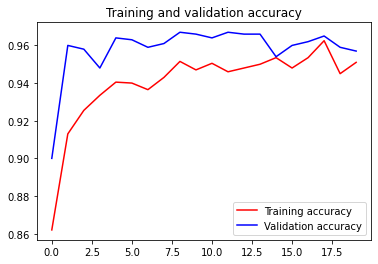

<Figure size 432x288 with 0 Axes>

In [12]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()